# Hi, I'm Tayyaba Zahid 👋




---

## 🌟 About Me
- 🎓 **Education**: Bachelor’s in CS from University of Gujrat
- 💻 **Skills**: Python, SQL, Machine Learning, Data Visualization, Pandas, NumPy, Scikit-Learn, TensorFlow, Matplotlib, Seaborn, Excel, Power BI
- 🌱 **Currently Learning**: Python, Data Analytics, and Advanced Data Science techniques
- 🤝 **Looking to collaborate on**: Open-source data science projects and machine learning competitions
- 🔭 **Research Interests**: Data Science, AI Ethics, Predictive Modeling, Generative AI
- 📫 **How to reach me**: ktayyaba0909@gmail.com | https://www.linkedin.com/in/tayyaba-zahid-031484226/



In [ ]:
# Regular EDA and plotting libraries
import numpy as np # np is short for numpy
import pandas as pd # pandas is so commonly used, it's shortened to pd
import matplotlib.pyplot as plt
import seaborn as sns # seaborn gets shortened to sns

# We want our plots to appear in the notebook
%matplotlib inline

## Models
from sklearn.linear_model import LogisticRegression


## Model evaluators
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score


# Print last updated
import time
print(f"Last updated: {time.asctime()}")

Last updated: Mon Oct 21 18:59:14 2024


# Data Load

**Since Google Colab dont recognize the file path when you give it as you have at your system , so first we need to upload the file on drive and import the drive and give it access to our file **

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
ls

drive/  sample_data/


In [ ]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [ ]:
df=pd.read_csv("heart dataset.csv")  #df is a short term use for dataframes

***Now dataset have been loaded so now we will start working on it , First lets get familair with the dataset , its shape , size , type and other things ***

In [ ]:
df.shape

(303, 14)

In [ ]:
df.head() # to look for the top rows here it will show the first 5 rows , why 5 only? because we didn't specify the number of rows we want to see so it will show 5 by default

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail(5) #here tail function will show the last 5 rows of the dataset

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
df.info() #this function will give you detail about your dataset like columns, their type and rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# let's check if we have any null values in the dataset to make sure our dataset is pretty clean
df.isnull().value_counts()

,,,,,,,,,,,,,,count
age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,
False,False,False,False,False,False,False,False,False,False,False,False,False,False,303


**So above we saw that we dont have any null value in the dataset **


In [ ]:
#since we check the null values , let's no forget to check if our dataset have any duplicates,it will give our dataset a clean chit
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
298,False
299,False
300,False
301,False


*Boom! our dataset have no null values, no duplicates and its clean chit for us to go and dive deep into analysis and further working *

# EDA (Exploratory Data Analysis)


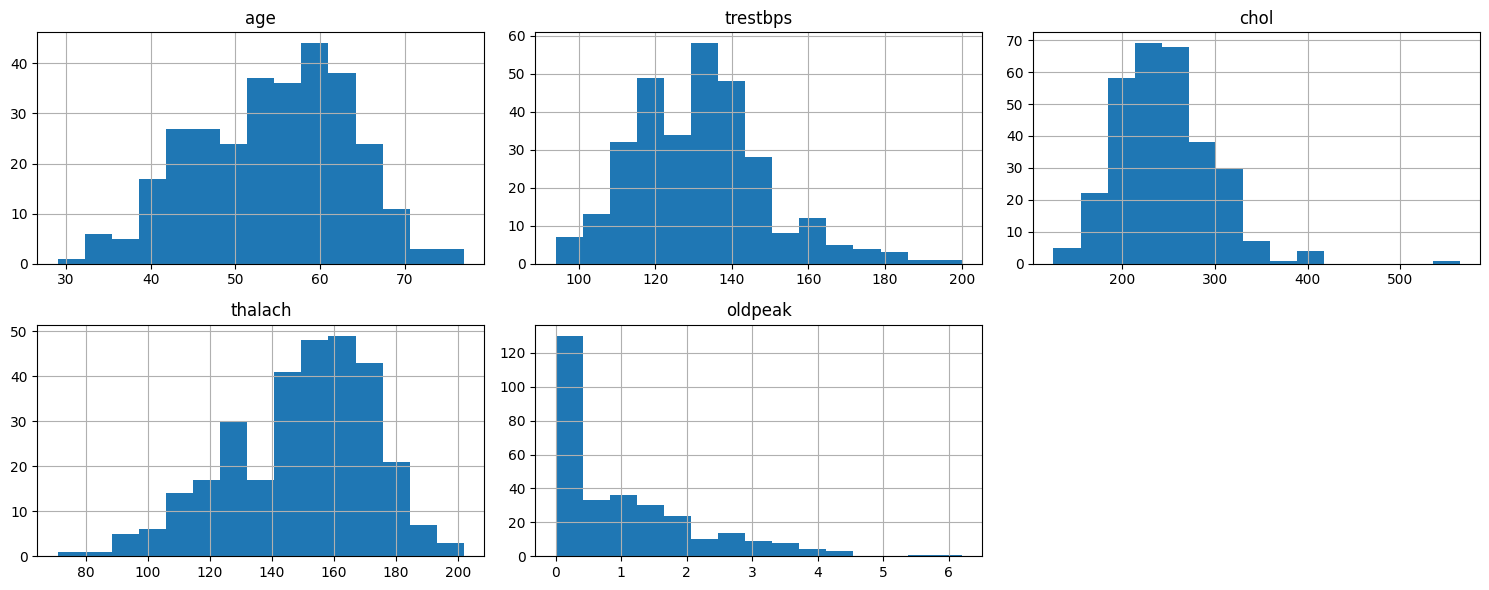

In [ ]:
# Plot histograms for continuous variables
continuous_vars = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[continuous_vars].hist(bins=15, figsize=(15, 6), layout=(2, 3))
plt.tight_layout()
plt.show()




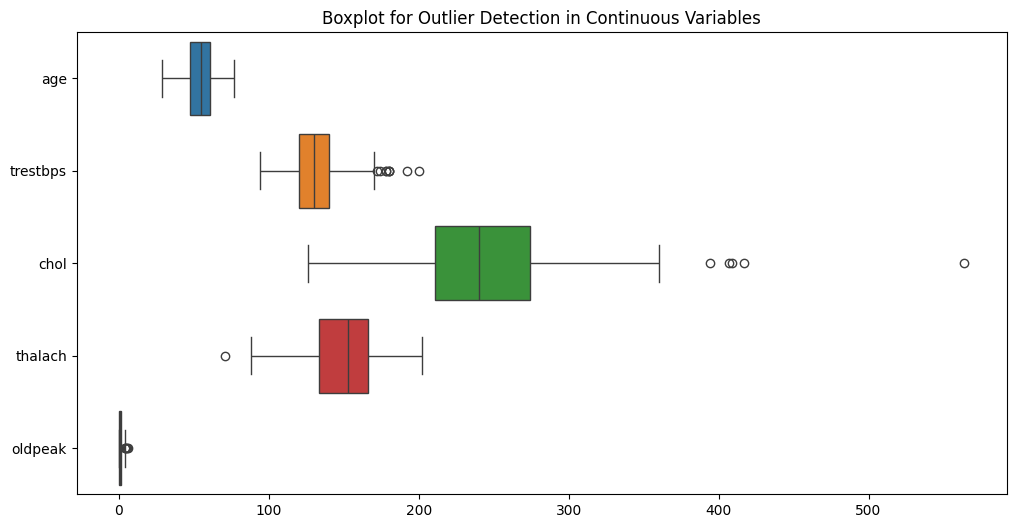

In [ ]:
# Outliers detection using boxplot (already done in univariate analysis)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[continuous_vars], orient='h')
plt.title('Boxplot for Outlier Detection in Continuous Variables')
plt.show()


*Oops! we detected some outliers here , lets try to figure out how can we handle them *

In [ ]:
# Function to detect outliers using IQR method
def detect_outliers(df, columns):
    outlier_dict = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_count = outliers.shape[0]

        if outlier_count > 0:
            outlier_dict[column] = outlier_count

    return outlier_dict

# Detect outliers in the continuous columns
outliers = detect_outliers(df, continuous_vars)

outliers  # Display the columns with outliers and their count


{'trestbps': 9, 'chol': 5, 'thalach': 1, 'oldpeak': 5}

***Since we have found that which rows from those continous variables having outliers, and they are potential outliers so its better to get them remove ***

In [ ]:
def remove_outliers(df, columns):
    df_cleaned = df.copy()
    for column in columns:
        Q1 = df_cleaned[column].quantile(0.25)
        Q3 = df_cleaned[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df_cleaned = df_cleaned[(df_cleaned[column] >= lower_bound) & (df_cleaned[column] <= upper_bound)]
    return df_cleaned

columns_with_outliers = ['trestbps', 'chol', 'thalach', 'oldpeak']
df_no_outliers = remove_outliers(df, columns_with_outliers)

print(f"New shape after removing outliers: {df_no_outliers.shape}")


New shape after removing outliers: (284, 14)


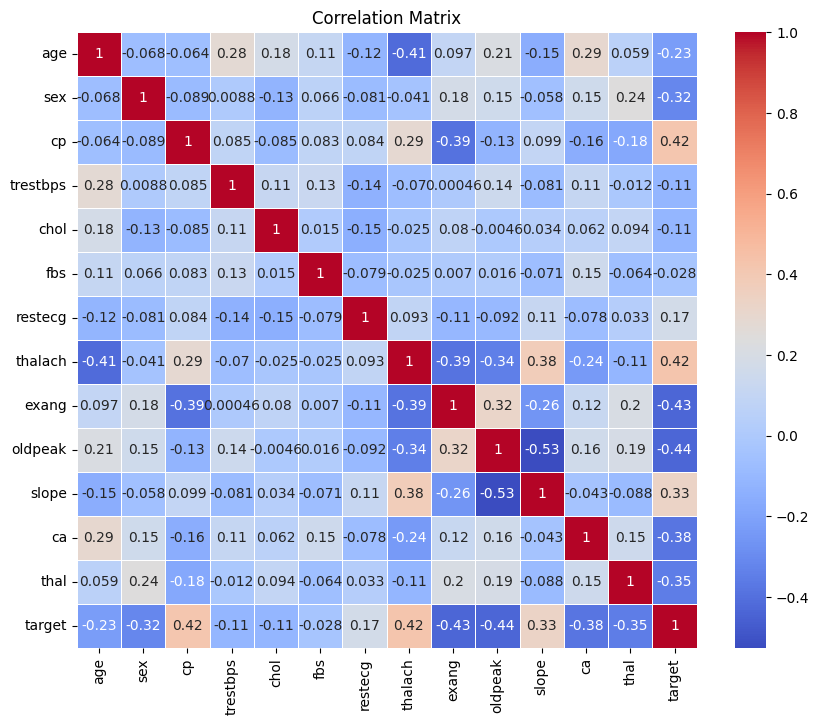

In [ ]:
#1 Correlation matrix afer handling outliers
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(df_no_outliers.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


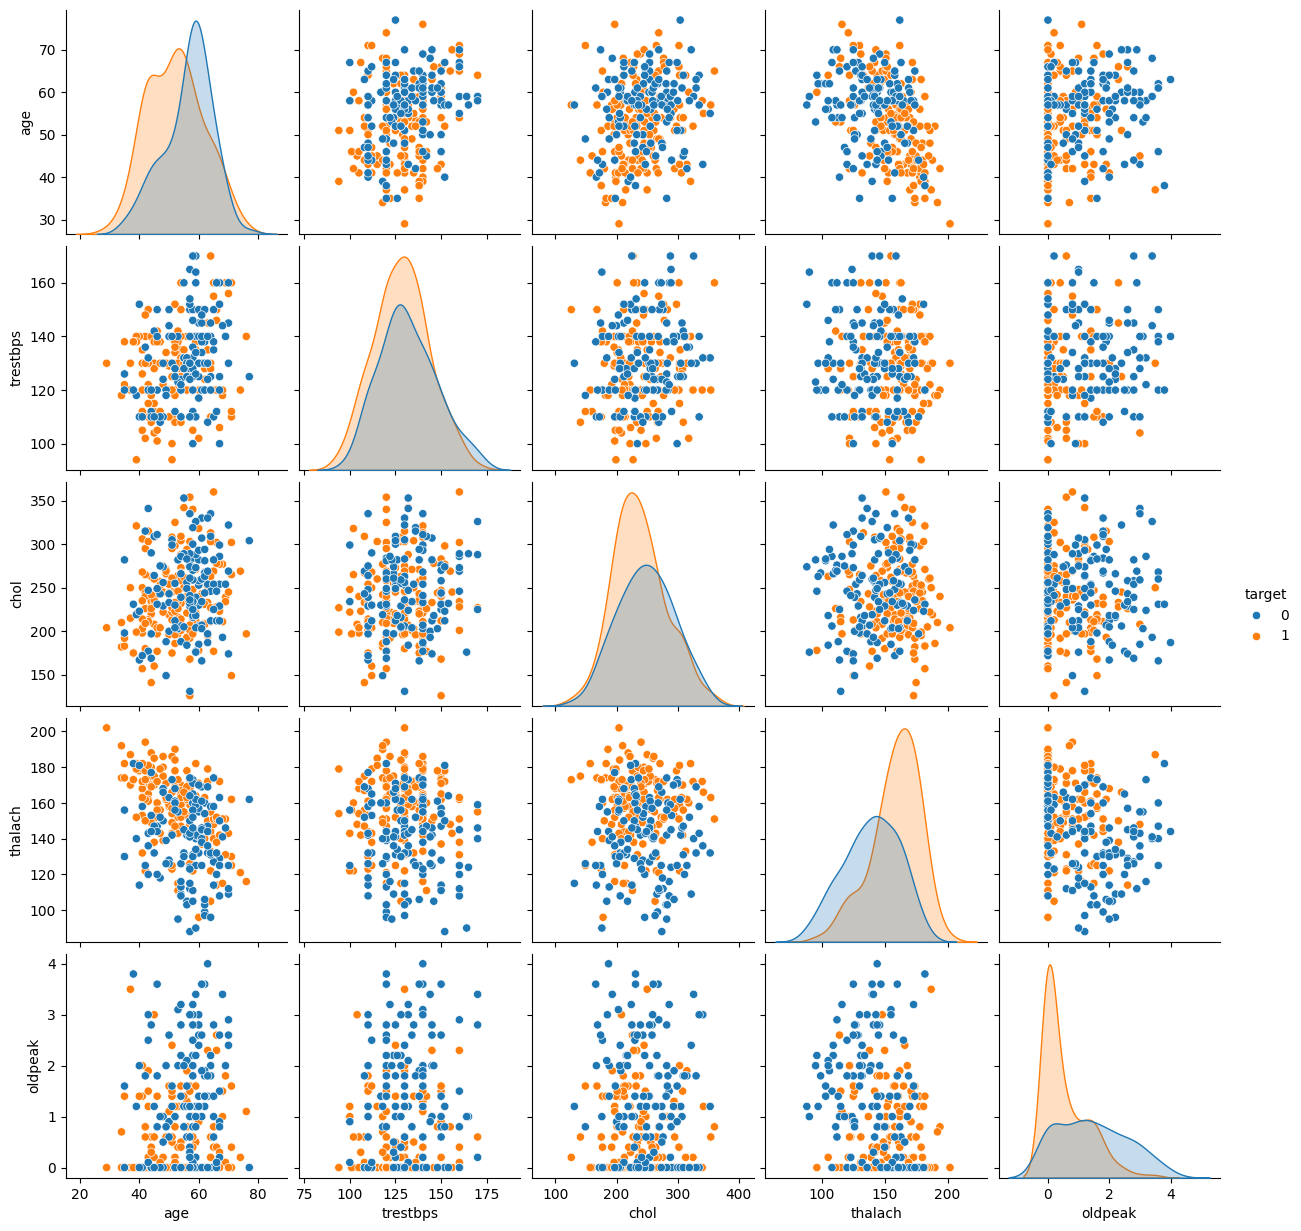

In [ ]:
# 2 pair plots for key variables
sns.pairplot(df_no_outliers, hue='target', vars=['age', 'trestbps', 'chol', 'thalach', 'oldpeak'])
plt.show()

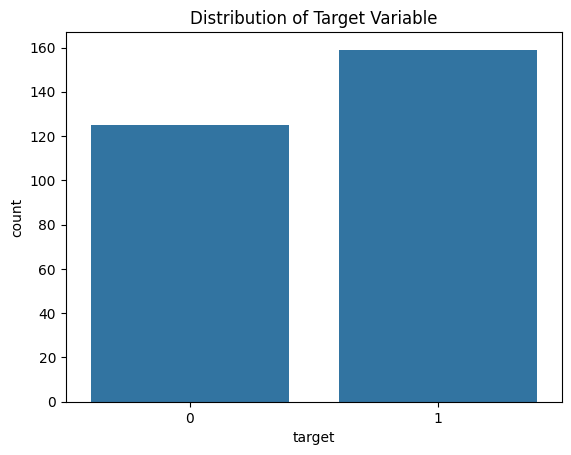

In [ ]:
#3 Count plot of target variable
sns.countplot(x='target', data=df_no_outliers)
plt.title('Distribution of Target Variable')
plt.show()

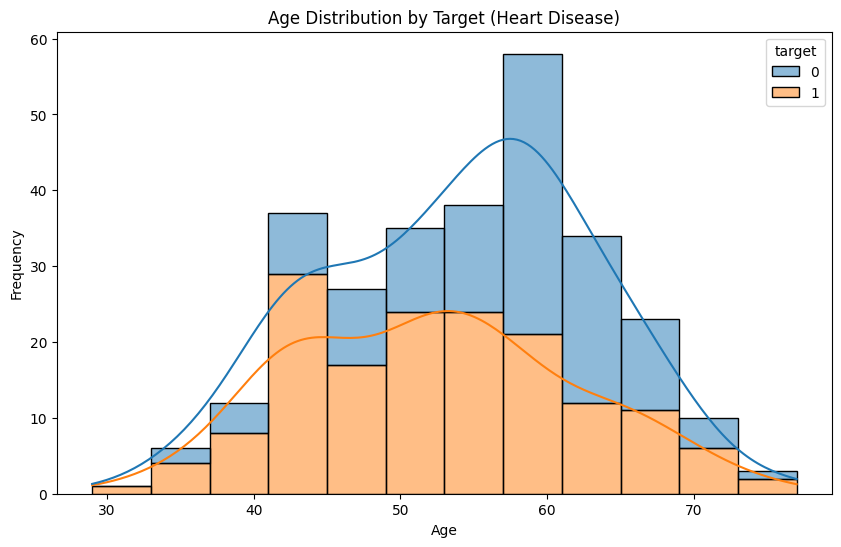

In [ ]:
#4 Age Distribution by Target
plt.figure(figsize=(10, 6))
sns.histplot(data=df_no_outliers, x='age', hue='target', multiple='stack', kde=True)
plt.title('Age Distribution by Target (Heart Disease)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

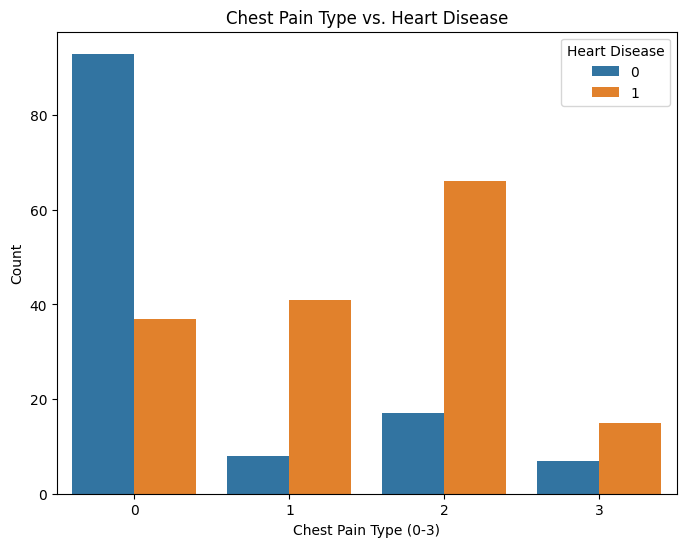

In [ ]:
#5 Chest pain type vs target
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='target', data=df_no_outliers)
plt.title('Chest Pain Type vs. Heart Disease')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

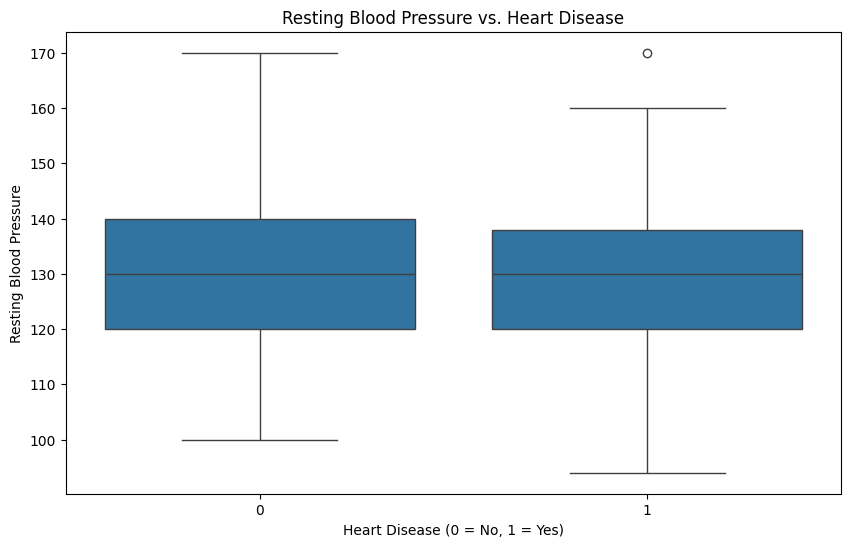

In [ ]:
 #6 Resting Blood Pressure (trestbps) vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=df_no_outliers)
plt.title('Resting Blood Pressure vs. Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Resting Blood Pressure')
plt.show()

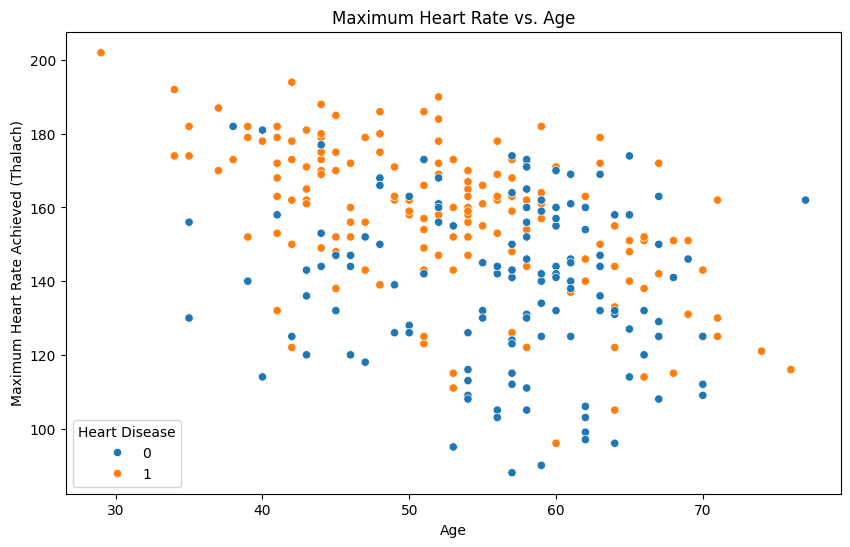

In [ ]:
# 7. Thalach (Maximum Heart Rate) vs Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df_no_outliers)
plt.title('Maximum Heart Rate vs. Age')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate Achieved (Thalach)')
plt.legend(title='Heart Disease', loc='lower left')
plt.show()

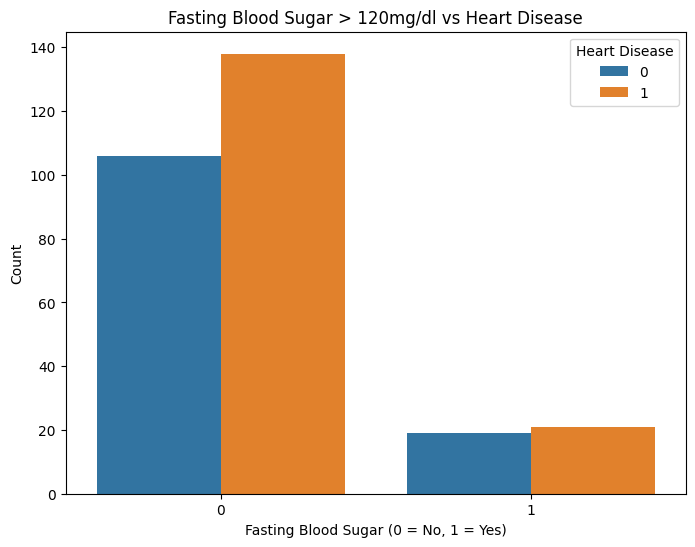

In [ ]:
# 8. Fasting Blood Sugar (fbs) vs Target
plt.figure(figsize=(8, 6))
sns.countplot(x='fbs', hue='target', data=df_no_outliers)
plt.title('Fasting Blood Sugar > 120mg/dl vs Heart Disease')
plt.xlabel('Fasting Blood Sugar (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', loc='upper right')
plt.show()

**Woah! Seems like we have perform pretty EDA on the given dataset and find key information and drived useful information from it ...lets move to the more exciting part of the work....** ***Model Prediction*** ⚡

# Data Preparation

In [ ]:
# Preparing data for modeling
X = df_no_outliers.drop(columns=['target'])  # Features
y = df_no_outliers['target']  # Target variable

In [ ]:
# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Here we are going to use 3 classification models and will find out which one has the most accuracy **

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Logistic Regression

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.8771929824561403
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        26
           1       0.85      0.94      0.89        31

    accuracy                           0.88        57
   macro avg       0.88      0.87      0.87        57
weighted avg       0.88      0.88      0.88        57



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Decision Tree

In [ ]:
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dtree))
print(classification_report(y_test, y_pred_dtree))

Decision Tree Accuracy: 0.8596491228070176
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        26
           1       0.87      0.87      0.87        31

    accuracy                           0.86        57
   macro avg       0.86      0.86      0.86        57
weighted avg       0.86      0.86      0.86        57



# Random Forest





In [ ]:
rforest = RandomForestClassifier(random_state=42)
rforest.fit(X_train, y_train)
y_pred_rforest = rforest.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rforest))
print(classification_report(y_test, y_pred_rforest))

Random Forest Accuracy: 0.8421052631578947
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.84      0.87      0.86        31

    accuracy                           0.84        57
   macro avg       0.84      0.84      0.84        57
weighted avg       0.84      0.84      0.84        57



*So we applied the Three classifiers and got their accuracy score , Logistic Regression have the accuracy score of 88%, Decision Tree have 86% and the last one Randome Forest had the accuracy score of 84% which means Logistic Regression have the best accuracy prediction score for our dataset *

In [ ]:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Function for user input and prediction
def predict_heart_disease():
    print("Please provide the following information:")

    # Collecting user input for the required features
    age = int(input("Age: "))
    sex = int(input("Sex (1 = Male, 0 = Female): "))
    cp = int(input("Chest Pain Type (0, 1, 2, 3): "))
    trestbps = int(input("Resting Blood Pressure: "))
    chol = int(input("Serum Cholesterol (mg/dl): "))
    fbs = int(input("Fasting Blood Sugar > 120mg/dl (1 = Yes, 0 = No): "))
    restecg = int(input("Resting Electrocardiographic Results (0, 1, 2): "))
    thalach = int(input("Maximum Heart Rate Achieved: "))
    exang = int(input("Exercise-Induced Angina (1 = Yes, 0 = No): "))
    oldpeak = float(input("ST Depression Induced by Exercise (oldpeak): "))
    slope = int(input("Slope of the Peak Exercise ST Segment (0, 1, 2): "))
    ca = int(input("Number of Major Vessels Colored by Fluoroscopy (0-3): "))
    thal = int(input("Thalium Stress Result (thal): (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): "))

    # Combine the input into an array (same order as features in the model)
    user_data = np.array([[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]])

    # Scaling the input data
    user_data_scaled = scaler.transform(user_data)  # Apply the same scaler used during model training

    # Predict using the trained model
    prediction = logreg.predict(user_data_scaled)

    # Display result
    if prediction == 0:
        print("Prediction: The person does NOT have heart disease.")
    else:
        print("Prediction: The person HAS heart disease.")

# Call the function for prediction
predict_heart_disease()

Please provide the following information:
Age: 24
Sex (1 = Male, 0 = Female): 0
Chest Pain Type (0, 1, 2, 3): 4
Resting Blood Pressure: 120
Serum Cholesterol (mg/dl): 120
Fasting Blood Sugar > 120mg/dl (1 = Yes, 0 = No): 1
Resting Electrocardiographic Results (0, 1, 2): 2
Maximum Heart Rate Achieved: 150
Exercise-Induced Angina (1 = Yes, 0 = No): 0
ST Depression Induced by Exercise (oldpeak): 60
Slope of the Peak Exercise ST Segment (0, 1, 2): 2
Number of Major Vessels Colored by Fluoroscopy (0-3): 0
Thalium Stress Result (thal): (1 = Normal, 2 = Fixed Defect, 3 = Reversible Defect): 1
Prediction: The person does NOT have heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Dictionary
# **Understanding the Classification Report**

**The classification report provides key metrics to evaluate a model's performance:**


1.  Precision: Measures how many of the positive predictions made by the model were actually correct.
2. Recall: Measures how many of the actual positive cases were correctly identified by the model.

3.  F1-score: Combines precision and recall into a single metric, providing a balanced evaluation.
4.  Support: Indicates the number of samples in each class used for calculation.

5.  Accuracy: Represents the overall accuracy of the model, expressed as a decimal.

A perfect model would achieve a precision, recall, F1-score, and accuracy of 1.0.